## Application De SOM En Python

Pour comparer la sécurité des compagnies aériennes, nous avons dû regrouper les neurones de sortie de cartes auto-organisatrice(SOM) à l'aide d'une technique d'apprentissage automatique non supervisée (kmeans) qui regroupe les compagnies aériennes en différents groupes. Ces groupes sont:

1. Safe airlines (Compagnies aériennes sûres) <- 0.
2. Doubtfully safe airlines (Compagnies aériennes douteuses) <- 1.
3. Risky airlines (Compagnies aériennes risquées) <- 2. 

### Installation de SOM

In [1]:
#!pip install --user -U  SimpSOM

### Importation des 

In [2]:
import pandas as pd
import SimpSOM as sps
from sklearn.cluster import KMeans
import numpy as np

### Téléchargement du dataset

Nous sommes allés télécharger le dataset des compagnies aériennes sur Kaggle sur lien ci-dessous:

[https://www.kaggle.com/danoozy44/airline-safety](https://www.kaggle.com/danoozy44/airline-safety)

### Création de dataset

In [3]:
df = pd.read_csv("airline-safety.csv")
df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


### Data préprocessing

In [4]:
df.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


In [5]:
train = np.array(df.iloc[:, 1:])

### Entrainement du modèle Kohonen

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


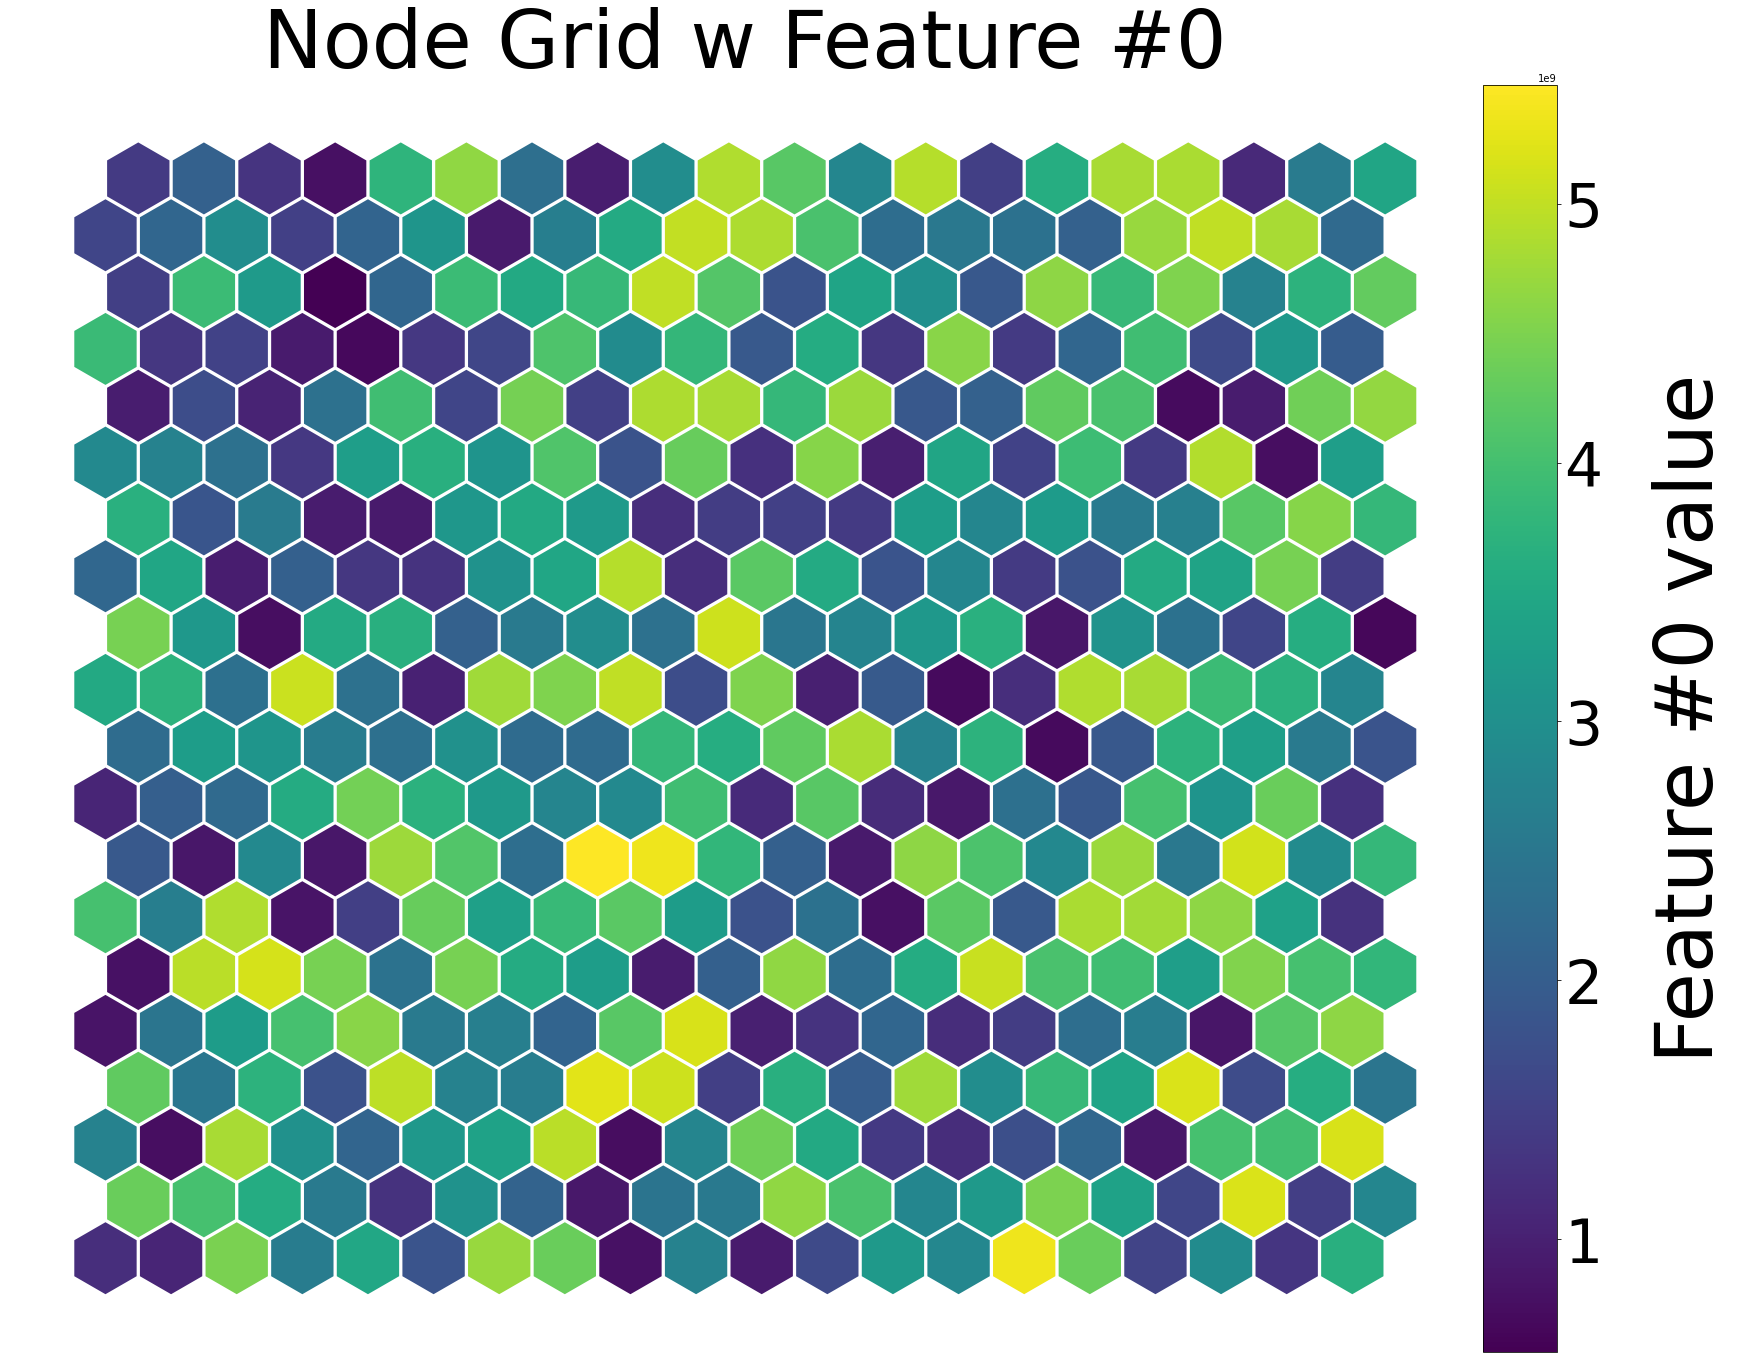

In [6]:
net = sps.somNet(20, 20, train, PBC=True)
net.train(0.01, 200)
net.save("filename_weights")
net.nodes_graph(colnum=0)

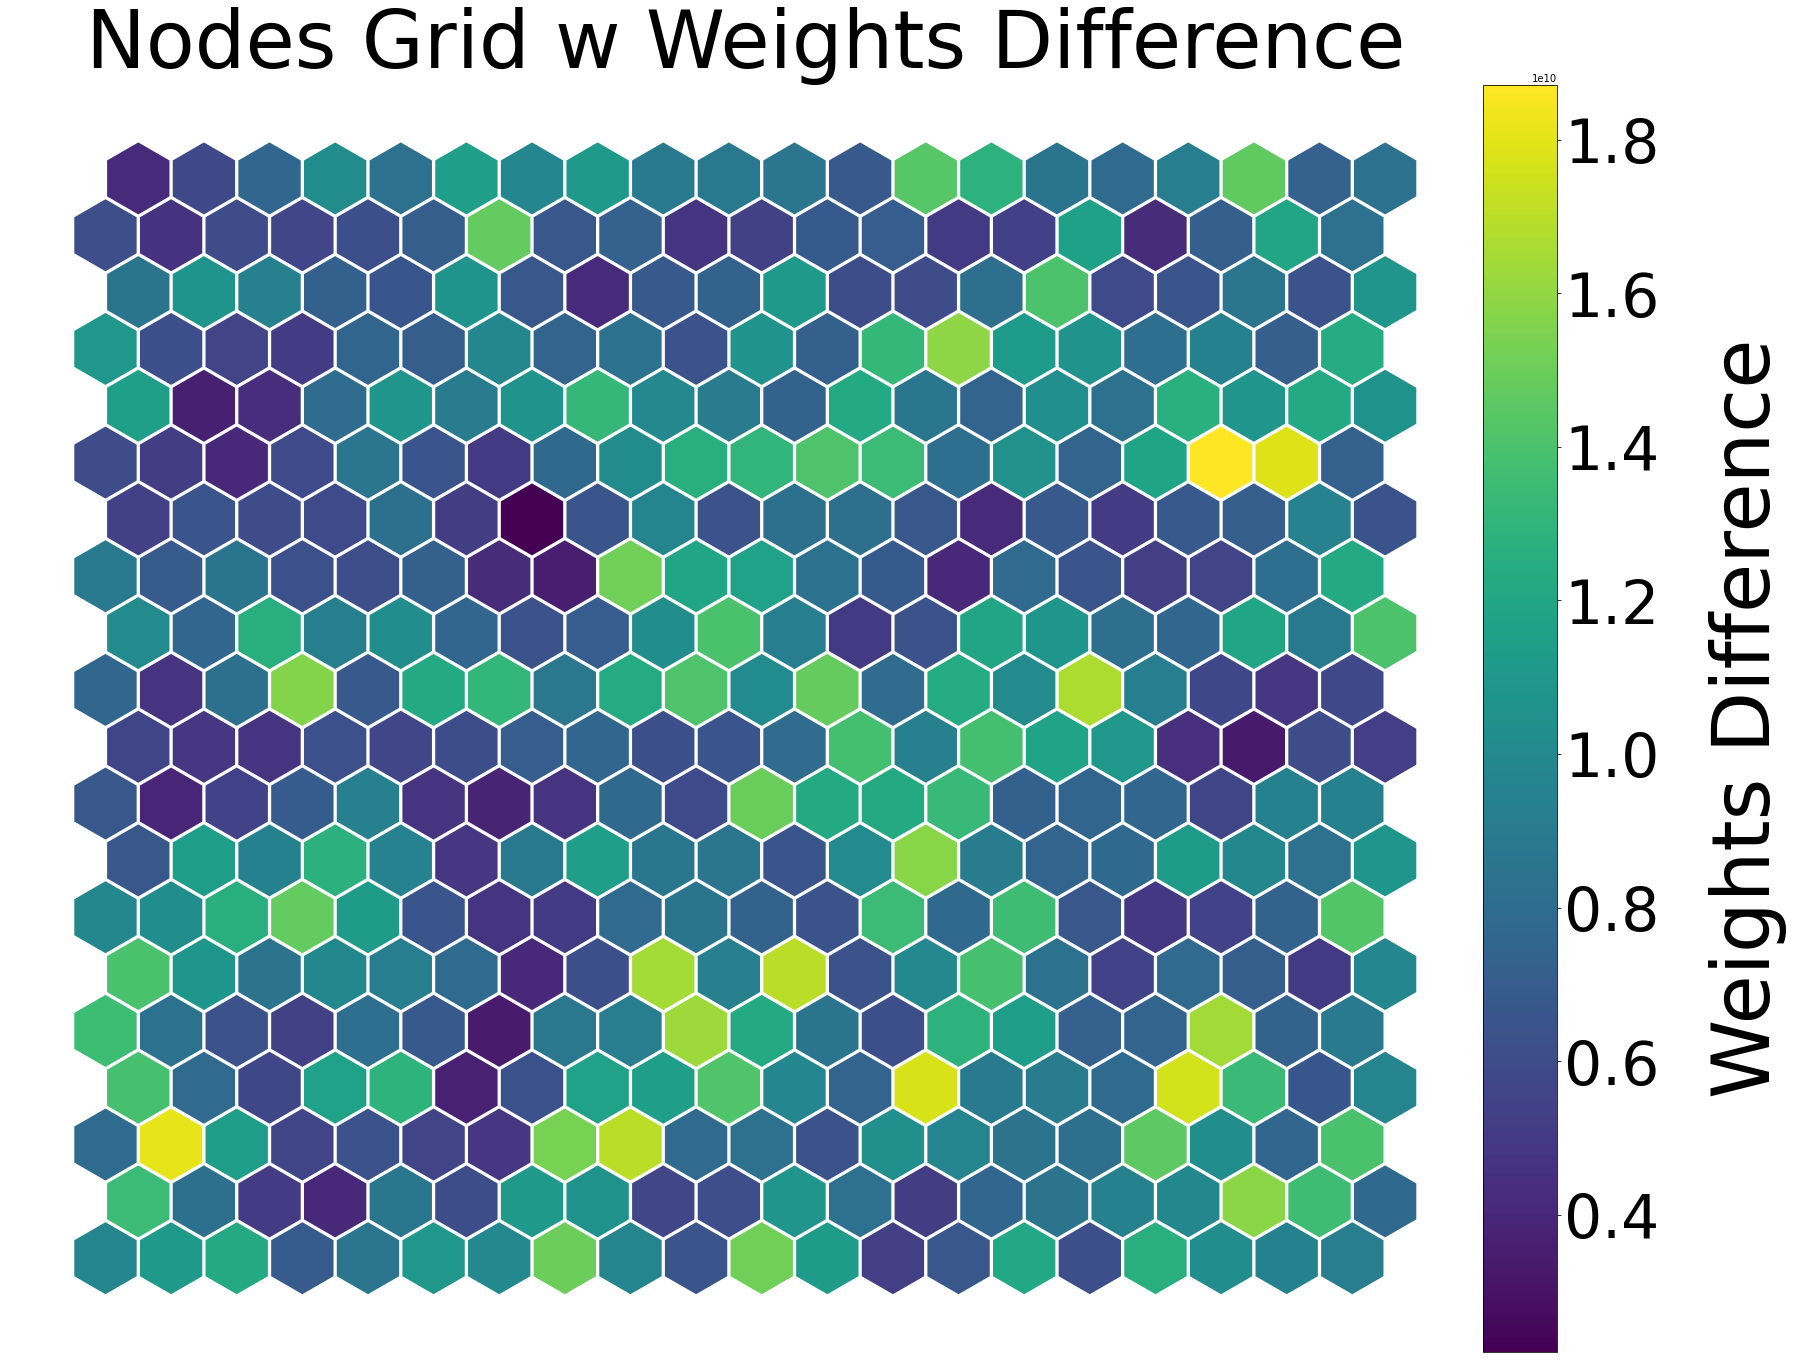

In [7]:
net.diff_graph()

In [8]:
import matplotlib.pyplot as plt

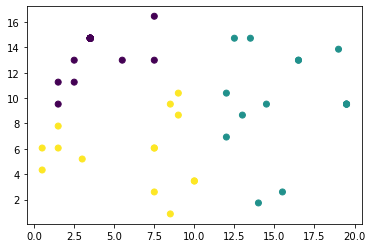

In [22]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)
df["clusters"]=kmeans.labels_

plt.scatter(prj.T[0],prj.T[1], c=df.clusters)
plt.show()


### Les compagnies aériennes sûrs

In [18]:
df[df["clusters"]==0].head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,clusters
0,Aer Lingus,320906734,2,0,0,0,0,0,0
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0,0
4,Air Canada,1865253802,2,0,0,2,0,0,0
8,Alaska Airlines*,965346773,5,0,0,5,1,88,0


In [40]:
df[df["clusters"]==1].head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,clusters
0,Aer Lingus,320906734,2,0,0,0,0,0,1
1,Aeroflot*,1197672318,76,14,128,6,1,88,1
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0,1
3,Aeromexico*,596871813,3,1,64,5,0,0,1
7,Air New Zealand*,710174817,3,0,0,5,1,7,1


### Les compagnies aériennes à risquées

In [42]:
df[df["clusters"]==2].head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,clusters
5,Air France,3004002661,14,4,79,6,2,337,2
6,Air India*,869253552,2,1,329,4,1,158,2
11,American*,5228357340,21,5,101,17,3,416,2
14,British Airways*,3179760952,4,0,0,6,0,0,2
19,Delta / Northwest*,6525658894,24,12,407,24,2,51,2


In [53]:
print('{:.2f} % des compagnies sont sûrs'.format(((len(df[df["clusters"]==0])/len(df))*100)))

19.64 % des compagnies sont sûrs


In [54]:
print('{:.2f} % des compagnies sont douteuses'.format(((len(df[df["clusters"]==1])/len(df))*100)))

62.50 % des compagnies sont douteuses


In [55]:
print('{:.2f} % des compagnies sont risquées'.format(((len(df[df["clusters"]==2])/len(df))*100)))

17.86 % des compagnies sont risquées


## Résumé

L'utilisation des SOM suit les étapes suivantes dans la formation du réseau:

1. Initialisez les poids des neurones cachés à de petites valeurs aléatoires ou utilisez l'initialisation du poids PCA.
2. Alimentez la ligne xi à la couche d'entrée.
3. Itérer à travers chaque neurone dans la couche cachée et trouver le BMU et ses unités voisines.
4. Appliquez la mise à jour du poids au BMU et à ses neurones voisins.
5. Réduire la fonction de voisinage.
6. Répétez les étapes 2 à 5 jusqu'à ce que la limite d'itération atteigne ou que le modèle converge.

## Réssources
1. The Ultimate guide to Self organizing maps (SOM’s) by SuperDataScience Team. link <br>
   [https://www.superdatascience.com/blogs/the-ultimate-guide-to-self-organizing-maps-soms](https://www.superdatascience.com/blogs/the-ultimate-guide-to-self-organizing-maps-soms)
   
   
2. Analyzing Climate Patterns with Self-Organizing Maps (SOMs) by Haihan Lan link <br>
 [https://towardsdatascience.com/analyzing-climate-patterns-with-self-organizing-maps-soms-8d4ef322705b](https://towardsdatascience.com/analyzing-climate-patterns-with-self-organizing-maps-soms-8d4ef322705b)<br/>
    
    
3. An introduction to self organizing maps by Umut Asan and Secil Ercan link <br>
[https://www.researchgate.net/publication/263084866_An_Introduction_to_Self-Organizing_Maps](https://www.researchgate.net/publication/263084866_An_Introduction_to_Self-Organizing_Maps)


4. Reach our site <br/>[https://www.dalicodes.com/](https://www.dalicodes.com/)
  